# Learning Curves

In [2]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

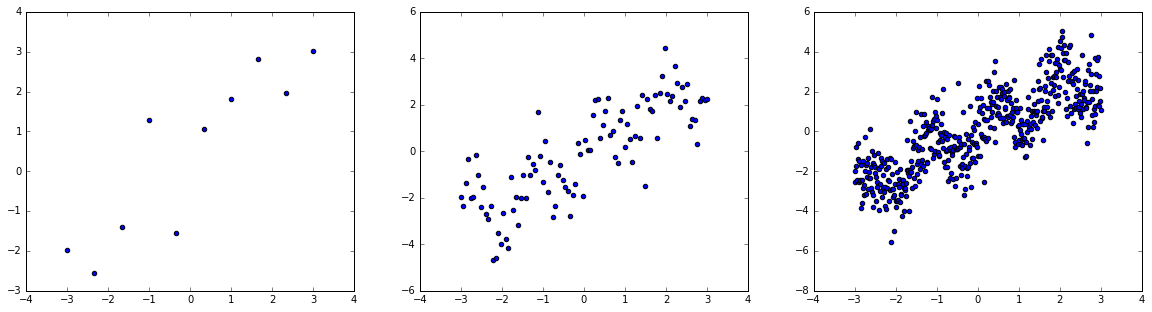

In [4]:
def make_dataset(n_samples=100):
    rnd = np.random.RandomState(42)
    x = np.linspace(-3, 3, n_samples)
    y_no_noise = np.sin(4 * x) + x
    y = y_no_noise + rnd.normal(size=len(x))
    return x, y

fig, axes = plt.subplots(1, 3, figsize = (20, 5))
for n_samples, ax in zip([10, 100, 500], axes.ravel()):
    X, y = make_dataset(n_samples = n_samples)
    ax.scatter(X, y)

In [6]:
from sklearn.learning_curve import learning_curve

from sklearn.cross_validation import KFold
from sklearn.linear_model import Ridge

from sklearn.datasets import load_boston
boston = load_boston()

cv = KFold(n_folds = 10, n = len(boston.data), shuffle = True)
train_sizes, train_scores, validation_scores = learning_curve(Ridge(alpha = 1), boston.data, boston.target, cv = cv)

print("Dataset size : %d" % boston.data.shape[0])
print("training set sizes: %s" % train_sizes)

Dataset size : 506
training set sizes: [ 45 147 250 352 455]


In [7]:
train_scores.shape

(5L, 10L)

In [13]:
def plot_learning_curve(train_sizes, train_scores, validation_scores):
    train_scores_mean = np.mean(train_scores, axis = 1)
    train_scores_std = np.std(train_scores, axis = 1)
    validation_scores_mean = np.mean(validation_scores, axis = 1)
    validation_scores_std = np.std(validation_scores, axis = 1)
    
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha = 0.1, color = "r")
    plt.fill_between(train_sizes, validation_scores_mean - validation_scores_std, validation_scores_mean + validation_scores_std, alpha = 0.1, color = "g")
    plt.plot(train_sizes, train_scores_mean, 'o--', color = 'r', label = 'Training score')
    plt.plot(train_sizes, validation_scores_mean, 'o--', color = 'g', label = 'CV-score')
    plt.legend(loc = 'best')

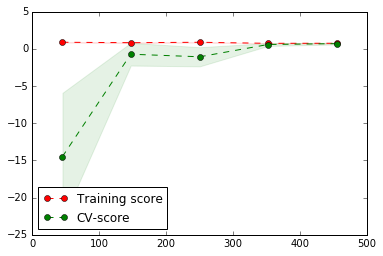

In [14]:
plot_learning_curve(train_sizes, train_scores, validation_scores)

In [15]:
train_sizes, train_scores, validation_scores = learning_curve(Ridge(alpha = 0.001), boston.data, boston.target, cv = cv)

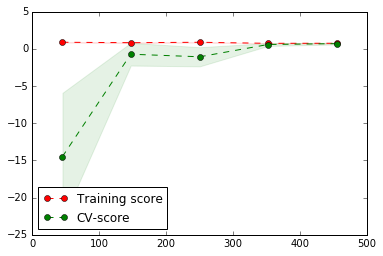

In [16]:
plot_learning_curve(train_sizes, train_scores, validation_scores)